<a href="https://colab.research.google.com/github/surupi/MachineLearning-IEM2ndYear/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting Drive to make dataset available for use

In [ ]:
import io
# Python io module allows us to manage the file-related input and output operations 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Fitting dataset in a dataframe (df)

In [ ]:
# to get the address, go to drive on left side, press on three dots and click copy path
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/CSV - Simple&MultipleLinearRegression.csv')
print("Shape of dataframe: ", df.shape)
print("Columns of dataframe: ", df.columns)
df.describe()

Shape of dataframe:  (1067, 4)
Columns of dataframe:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions'], dtype='object')


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


#Data Visualization

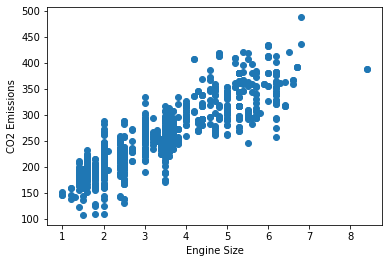

In [ ]:
x = df.Engine_Size.to_numpy()
y = df.CO2_Emissions.to_numpy()
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.scatter(x,y)

#Splitting data into training and testing set

In [ ]:
# 80% - train set,
# 20% - test set

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size =0.2, random_state=0)

print("Training data: ")
print(train.head)

print("Testing data: ")
print(test.head)

'''
One way to divide data into 3 sets: train,test, validate using one single dataset
step1: divide 100% of the given data into 70% as train and 30% as rest
step2: divide the rest 30% of the data into 20% as test and 10% as validate
Do both steps using train_test_split
'''

Training data: 
<bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
270           3.6          6              14.6            290
1006          4.6          8              16.9            347
728           3.5          6              12.1            244
992           2.5          4              10.6            218
702           1.5          4               8.0            170
...           ...        ...               ...            ...
1033          2.0          4               7.9            186
763           3.5          6              17.8            256
835           3.7          6              13.5            269
559           5.0          8              15.8            306
684           3.7          6              13.1            262

[853 rows x 4 columns]>
Testing data: 
<bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
766           5.5          8              17.2            356
204           2.

'\nOne way to divide data into 3 sets: train,test, validate using one single dataset\nstep1: divide 100% of the given data into 70% as train and 30% as rest\nstep2: divide the rest 30% of the data into 20% as test and 10% as validate\nDo both steps using train_test_split\n'

# Simple linear Regression

In [ ]:
from sklearn import linear_model
slr = linear_model.LinearRegression()
#asanyarray() function is used when we want to convert input to an array but it pass ndarray subclasses through.
train_x = np.asanyarray(train[["Engine_Size"]]) #double brackets = [[]] = are required
train_y = np.asanyarray(train[["CO2_Emissions"]])
slr.fit(train_x,train_y)

#value of coefficient
print("X Coefficient: ", slr.coef_)
print("Y Coefficient: ", slr.intercept_)

X Coefficient:  [[39.24838431]]
Y Coefficient:  [126.18920155]


Text(0, 0.5, 'CO2 Emissions')

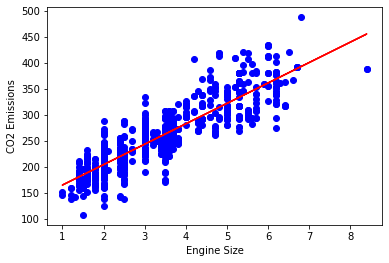

In [ ]:
plt.scatter(train.Engine_Size, train.CO2_Emissions, c ="blue")
plt.plot(train_x, slr.coef_[0][0]*train_x + slr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["Engine_Size"]])
test_y_actual = np.asanyarray(test[["CO2_Emissions"]])
test_y_predicted = slr.predict(test_x)
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_predicted - test_y_actual)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_predicted - test_y_actual)**2))
print('R2 Score: %.2f' % r2_score(test_y_actual, test_y_predicted))
#R2 score = amount of the variation in the output dependent attribute which is predictable from the input independent variables

Mean absolute error: 25.57
Residual sum of squares (MSE): 1181.53
R2 Score: 0.72
